In [0]:
import pandas as pd
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from google.colab import files
url = 'https://github.com/bosinupebi/Data-Science/raw/master/creditcarddefaults.csv'


In [0]:
df=pd.read_csv(url) #read data into dataframe

In [0]:
df.describe() #dataset description

,amountofcredit,Gender,Education,MaritalStatus,Age,LastPayment,Default
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000
mean,162984.152139,1.567353,1.828843,1.562599,35.983360,0.090333,0.313788
std,129965.522431,0.495639,0.781948,0.539153,9.417645,1.152765,0.464215
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,43.000000,1.000000,1.000000
max,750000.000000,2.000000,5.000000,3.000000,67.000000,8.000000,1.000000


In [0]:
# Marital Status of 0 and Education of 5 are not meaningful. These rows can be dropped from the analysis.
df[df.Education != 5]
df[df.MaritalStatus != 0]

,Date,amountofcredit,Gender,Education,MaritalStatus,Age,LastPayment,Default
0,7/19/2010,180000,1,2,2,24,-2,0
1,7/20/2010,50000,1,2,2,33,1,1
2,7/21/2010,150000,2,1,1,29,-1,1
3,7/22/2010,340000,2,1,2,30,1,1
4,7/23/2010,300000,2,2,2,33,0,0
5,7/24/2010,150000,2,1,1,36,-1,1
6,7/25/2010,30000,1,1,2,38,2,0
7,7/26/2010,50000,1,2,2,52,0,0
8,7/27/2010,100000,1,1,1,42,-1,1
9,7/28/2010,270000,2,2,1,35,-1,0


In [0]:
data=df.copy() #create a copy of the original frame
data['elderly'] = np.where(data['Age']>=40, 'yes', 'no') #create a column based on age >= 40

In [0]:
data.head() #look into data

,Date,amountofcredit,Gender,Education,MaritalStatus,Age,LastPayment,Default,elderly
0,7/19/2010,180000,1,2,2,24,-2,0,no
1,7/20/2010,50000,1,2,2,33,1,1,no
2,7/21/2010,150000,2,1,1,29,-1,1,no
3,7/22/2010,340000,2,1,2,30,1,1,no
4,7/23/2010,300000,2,2,2,33,0,0,no


In [0]:
data.isna().sum() #check for null values

Date              0
amountofcredit    0
Gender            0
Education         0
MaritalStatus     0
Age               0
LastPayment       0
Default           0
elderly           0
dtype: int64

In [0]:
#function to calculate percentage of defaults
def calculate_percentage (default_count, total_count,label):
    print("Percentage of {} is {} %".format(label,((total_count * 100) / default_count)))

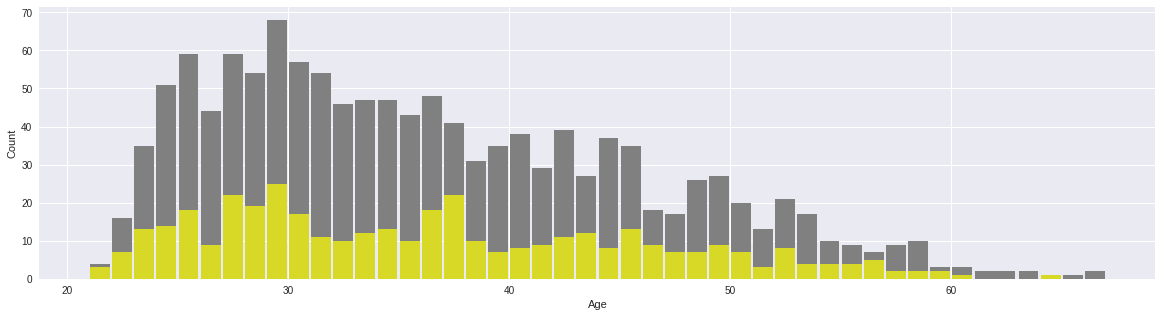

Percentage of 21 is 75.0 %
Percentage of 22 is 43.75 %
Percentage of 23 is 37.142857142857146 %
Percentage of 24 is 27.45098039215686 %
Percentage of 25 is 30.508474576271187 %
Percentage of 26 is 20.454545454545453 %
Percentage of 27 is 37.28813559322034 %
Percentage of 28 is 35.18518518518518 %
Percentage of 29 is 36.76470588235294 %
Percentage of 30 is 29.82456140350877 %
Percentage of 31 is 20.37037037037037 %
Percentage of 32 is 21.73913043478261 %
Percentage of 33 is 25.53191489361702 %
Percentage of 34 is 27.659574468085108 %
Percentage of 35 is 23.25581395348837 %
Percentage of 36 is 37.5 %
Percentage of 37 is 53.65853658536585 %
Percentage of 38 is 32.25806451612903 %
Percentage of 39 is 20.0 %
Percentage of 40 is 21.05263157894737 %
Percentage of 41 is 31.03448275862069 %
Percentage of 42 is 28.205128205128204 %
Percentage of 43 is 44.44444444444444 %
Percentage of 44 is 21.62162162162162 %
Percentage of 45 is 37.142857142857146 %
Percentage of 46 is 50.0 %
Percentage of 47 i

In [0]:
#plot to show probability of defaults by age
plt.figure(figsize=(20,5))
plt.hist(data['Age'], sorted(data['Age'].unique()),rwidth=0.9, color ='grey')
plt.hist(data['Age'][(data['Default']==1)], sorted(data['Age'].unique()),rwidth=0.9,color='yellow',alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

age_percentage_dataframe = pd.DataFrame(columns=['Age', 'Percentage'])

for x in sorted(data['Age'].unique()):
    calculate_percentage(
                         data['Age'][data['Age']==x ].count(),data['Age'][(data['Age']==x )&(data['Default']==1)].count(), x
                               )

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


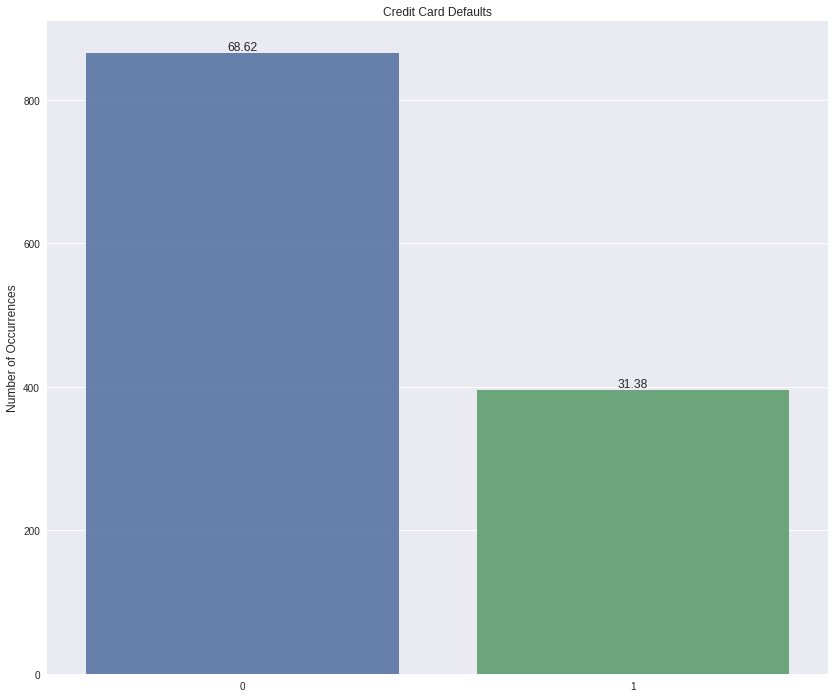

In [0]:
#number of default vs no default
plt.figure(figsize=(14,12))
total = float(len(data))
Default = data['Default'].value_counts()
sns.set(style="darkgrid")
ax = sns.barplot(Default.index, Default.values, alpha=0.9)
for p in ax.patches: #add percentage as text on graph
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100*height/total),
            ha="center")
plt.title('Credit Card Defaults')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


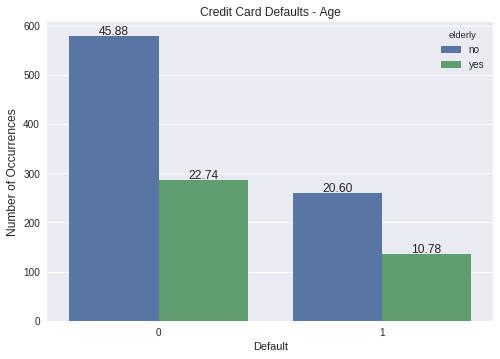

In [0]:
#defaults by age
ax1=sns.countplot(x="Default", hue="elderly", data=data)
for p in ax1.patches: #add percentage as text on graph
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100*height/total),
            ha="center")
plt.title('Credit Card Defaults - Age')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
posx and posy should be finite values
posx and posy should be finite values


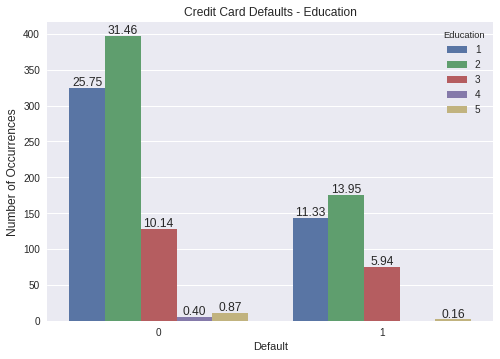

In [0]:
#defaults by education type
ax2=sns.countplot(x="Default", hue="Education", data=data)
for p in ax2.patches: #add percentage as text on graph
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100*height/total),
            ha="center")
plt.title('Credit Card Defaults - Education')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
posx and posy should be finite values
posx and posy should be finite values


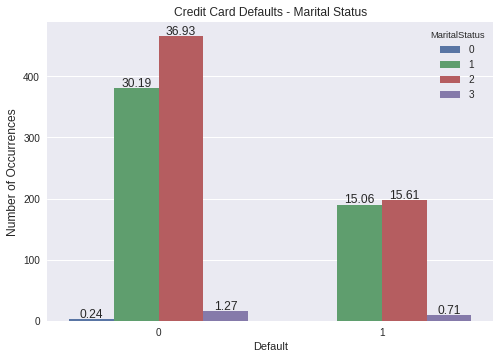

In [0]:
#defaults by marital status
ax3=sns.countplot(x="Default", hue="MaritalStatus", data=data)
for p in ax3.patches: #add percentage as text on graph
    height = p.get_height()
    ax3.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100*height/total),
            ha="center")
plt.title('Credit Card Defaults - Marital Status')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


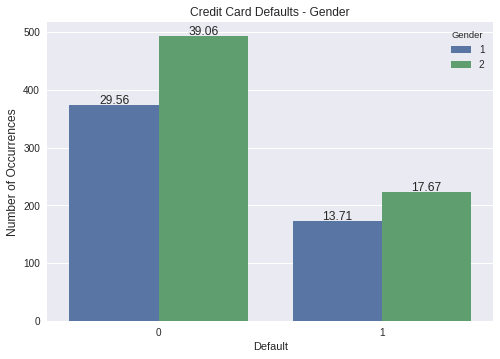

In [0]:
#defaults by gender
ax4=sns.countplot(x="Default", hue="Gender", data=data)
for p in ax4.patches: #add percentage as text on graph
    height = p.get_height()
    ax4.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(100*height/total),
            ha="center")
plt.title('Credit Card Defaults - Gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [0]:
df = df.drop(['Date'], axis=1)#drop the date column for the correlation matrix

In [0]:
df_to_analyse_t = df.T #transpose the dataframe

In [0]:
df_to_analyse_t #transposed dataframe

,0,1,2,3,4,5,6,7,8,9,...,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261
amountofcredit,180000,50000,150000,340000,300000,150000,30000,50000,100000,270000,...,350000,200000,140000,20000,20000,220000,290000,80000,16000,100000
Gender,1,1,2,2,2,2,1,1,1,2,...,2,2,1,1,2,1,2,2,2,2
Education,2,2,1,1,2,1,1,2,1,2,...,1,3,2,1,3,1,1,3,2,2
MaritalStatus,2,2,1,2,2,1,2,2,1,1,...,2,1,2,2,3,2,2,1,1,1
Age,24,33,29,30,33,36,38,52,42,35,...,33,30,27,25,55,37,36,40,48,33
LastPayment,-2,1,-1,1,0,-1,2,0,-1,-1,...,-2,-1,0,0,1,0,1,0,2,0
Default,0,1,1,1,0,1,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0


In [0]:
df.corr() #correlation table

,amountofcredit,Gender,Education,MaritalStatus,Age,LastPayment,Default
amountofcredit,1.000000,0.065609,-0.246783,-0.128664,0.155372,-0.252369,-0.114378
Gender,0.065609,1.000000,-0.041848,-0.017274,-0.111125,-0.057848,-0.005763
Education,-0.246783,-0.041848,1.000000,-0.089309,0.156944,0.145611,0.012623
MaritalStatus,-0.128664,-0.017274,-0.089309,1.000000,-0.357529,0.010034,-0.024680
Age,0.155372,-0.111125,0.156944,-0.357529,1.000000,-0.006436,0.009902
LastPayment,-0.252369,-0.057848,0.145611,0.010034,-0.006436,1.000000,0.281903
Default,-0.114378,-0.005763,0.012623,-0.024680,0.009902,0.281903,1.000000


([<matplotlib.axis.XTick at 0x7efc6e7c5f98>,
 <a list of 7 Text xticklabel objects>)

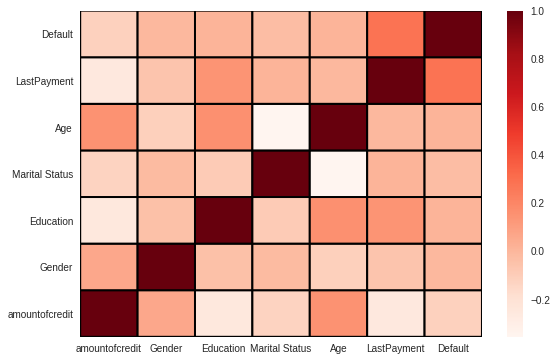

In [0]:
# Plot the correlation of the variables
from numpy import corrcoef, sum, log, arange
from pylab import pcolor, show, colorbar, xticks, yticks
plt.figure(figsize=(9,6))
R = corrcoef(df_to_analyse_t)
pcolor(R,edgecolors='k', linewidths=2,cmap=plt.cm.Reds)
colorbar()
yticks(arange(0.5,7),['amountofcredit', 'Gender', 'Education','Marital Status', 'Age','LastPayment','Default'])
xticks(arange(0.5,7),['amountofcredit', 'Gender', 'Education','Marital Status', 'Age','LastPayment','Default'])



In [0]:
X = np.array(data[['LastPayment','Gender','Education','Age','MaritalStatus','amountofcredit']]) #prepare the independent variables for knn
Y = np.array(data['Default']) #prepare the dependent variables for knn 

In [0]:
#Determine the accuracy of multiple algorithms
from sklearn import model_selection
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [0]:
#Determine the accuracy of multiple algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models: #iterate through each model type, print avg accuracy score and standard deviation
    kfold = model_selection.KFold(n_splits=10, random_state=seed)#split the dataset 10times
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') #cross validate accuracy
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)#Determine the accuracy of multiple algorithms

LR: 0.680871 (0.040287)
LDA: 0.708693 (0.048220)
KNN: 0.635277 (0.032819)
CART: 0.629356 (0.038452)
NB: 0.680871 (0.040287)
SVM: 0.674921 (0.039830)


In [0]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.578576
         Iterations 5
                         Results: Logit
Model:              Logit            No. Iterations:   5.0000   
Dependent Variable: y                Pseudo R-squared: 0.076    
Date:               2019-04-13 16:31 AIC:              1179.5657
No. Observations:   1009             BIC:              1209.0660
Df Model:           5                Log-Likelihood:   -583.78  
Df Residuals:       1003             LL-Null:          -631.85  
Converged:          1.0000           Scale:            1.0000   
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1        0.5977     0.0724    8.2608   0.0000    0.4559    0.7396
x2       -0.0036     0.1256   -0.0284   0.9773   -0.2498    0.2427
x3       -0.2063     0.0945   -2.1835   0.0290   -0.3914   -0.0211
x

In [0]:
#evaluate if accuracy can be increased by adjusting nearest neighbour
k = range(1,40,5)
avg_nz=[] #average non zero predictions
avg_z=[] #average false predictions
avg_score= [] #average accuracy score
#2 loops to iterate through each random train/test split and each nearest neighbour value
for i in k:
    split=np.random.uniform(low=0.1, high=0.3, size=(6))#train/test splits criteria
    score=[] 
    nz=[] 
    z=[]
    print('k =',i)
    for j in split:
        knn1 = KNeighborsClassifier(n_neighbors=i) 
        X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=j) 
        knn1.fit(X_train,y_train)
        y_pred=knn1.predict(X_test) 
        nz.append(np.count_nonzero(y_test==y_pred)) 
        z.append(np.count_nonzero(y_test!=y_pred))
        score.append(accuracy_score(y_test,y_pred)) 
    avg_score.append(np.mean(score))
    avg_z.append(np.mean(z))
    avg_nz.append(np.mean(nz)) 
    print("Average correct predictions: ", np.mean(nz))
    print('Average false predictions:',np.mean(z))
    print("Average accuracy score:", round(np.mean(score),4))
    print("")

k = 1
Average correct predictions:  148.66666666666666
Average false predictions: 100.5
Average accuracy score: 0.5926

k = 6
Average correct predictions:  172.16666666666666
Average false predictions: 79.5
Average accuracy score: 0.6807

k = 11
Average correct predictions:  143.33333333333334
Average false predictions: 72.5
Average accuracy score: 0.6634

k = 16
Average correct predictions:  181.16666666666666
Average false predictions: 84.66666666666667
Average accuracy score: 0.6786

k = 21
Average correct predictions:  123.66666666666667
Average false predictions: 62.666666666666664
Average accuracy score: 0.6664

k = 26
Average correct predictions:  144.5
Average false predictions: 68.0
Average accuracy score: 0.6811

k = 31
Average correct predictions:  184.5
Average false predictions: 87.5
Average accuracy score: 0.6775

k = 36
Average correct predictions:  209.0
Average false predictions: 98.5
Average accuracy score: 0.6818



In [0]:
model = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, Y_train)
model.coef_ #regression coefficients

array([[ 5.12023447e-04, -2.31964588e-04, -3.57615261e-04,
        -4.98742629e-03, -2.98933370e-04, -3.27104127e-06]])

Text(0.5, 1.0, 'Score vs k')

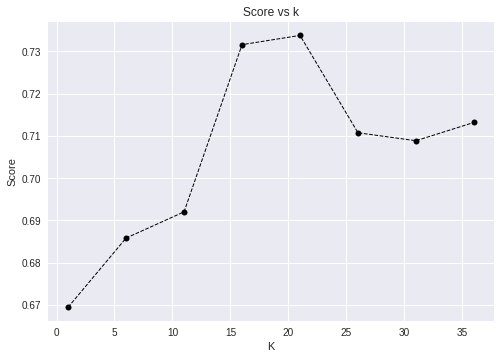

In [0]:
#plot accuracy scores vs k
plt.plot(k,avg_score,color='black', marker='o', linestyle='dashed',linewidth=1, markersize=6)
plt.xlabel('K')
plt.ylabel('Score')

plt.title('Score vs k')

In [0]:
print(classification_report(y_test, y_pred)) #Knn classification report

              precision    recall  f1-score   support

           0       0.74      0.98      0.84       127
           1       0.88      0.24      0.37        59

   micro avg       0.75      0.75      0.75       186
   macro avg       0.81      0.61      0.61       186
weighted avg       0.78      0.75      0.69       186

